# Meta Methods 


In [ ]:
# Import libraries 
import numpy as np    # Numeric and matrix computation
import pandas as pd  # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented
%matplotlib inline
import pandas
from sklearn.model_selection import cross_val_score  
import sklearn.model_selection as cv    # Pel Cross-validation
from pandas import plotting

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', -1)
pandas.set_option('display.precision', 3)
pandas.set_option('display.float_format', lambda x: '%.3f' % x)
# para volver a montar reinciar el entorno de ejecución
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive/MD'
df = pd.read_csv("sample_5000_con_outliers.csv")
#df=df.loc[:, df.columns!='Unnamed: 0']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


Mounted at /content/drive
/content/drive/MyDrive/MD


In [ ]:
df = df.iloc[:, 1:]

df.drop('artist_name', inplace=True, axis=1)
df.drop('track_name', inplace=True, axis=1)
df.drop('key', inplace=True, axis=1)
df.drop('mode', inplace=True, axis=1)
df.dtypes


popularity          float64
duration_s          float64
tempo               float64
valence             float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
music_genre         object 
dtype: object

In [ ]:
df

,popularity,duration_s,tempo,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,music_genre
0,21.000,214.000,120.002,0.454,0.004,0.713,0.824,0.492,0.311,-7.475,0.041,Electronic
1,51.000,533.013,121.852,0.123,0.078,0.475,0.591,0.055,0.109,-7.854,0.037,Electronic
2,43.000,220.755,119.978,0.962,0.169,0.685,0.909,0.001,0.204,-7.627,0.043,Electronic
3,30.000,233.893,113.475,0.771,0.058,0.815,0.509,0.112,0.095,-12.991,0.049,Electronic
4,36.000,330.000,127.996,0.487,0.122,0.878,0.921,0.022,0.258,-5.162,0.132,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,58.000,269.160,81.813,0.392,0.358,0.472,0.672,0.000,0.108,-4.997,0.212,Hip-Hop
4995,47.000,240.627,85.963,0.243,0.013,0.706,0.787,0.000,0.265,-5.314,0.089,Hip-Hop
4996,58.000,240.627,98.028,0.758,0.105,0.905,0.414,0.000,0.091,-8.112,0.061,Hip-Hop
4997,59.000,262.773,98.028,0.330,0.033,0.913,0.574,0.000,0.119,-7.022,0.044,Hip-Hop


In [ ]:
y = df['music_genre'].values
X = df.values[:,0:11].astype('float32')
print(y)
print(X)

['Electronic' 'Electronic' 'Electronic' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']
[[ 2.1000000e+01  2.1400000e+02  1.2000200e+02 ...  3.1099999e-01
  -7.4749999e+00  4.0899999e-02]
 [ 5.1000000e+01  5.3301300e+02  1.2185244e+02 ...  1.0900000e-01
  -7.8540001e+00  3.7400000e-02]
 [ 4.3000000e+01  2.2075525e+02  1.1997800e+02 ...  2.0405573e-01
  -7.6269999e+00  4.3000001e-02]
 ...
 [ 5.8000000e+01  2.4062700e+02  9.8028000e+01 ...  9.1399997e-02
  -8.1120005e+00  6.1500002e-02]
 [ 5.9000000e+01  2.6277301e+02  9.8028000e+01 ...  1.1900000e-01
  -7.0219998e+00  4.4100001e-02]
 [ 6.5000000e+01  2.6277301e+02  7.5886002e+01 ...  1.0600000e-01
  -5.0159998e+00  4.4100001e-02]]


In [ ]:
# No preprocessing needed. Numerical and scaled data
# Separate data from labels
#df=df.drop(df.index[[0]])
#y=df[16].values
#X=df.values[:,[0,3,4,7,8,9,10,11,12,13,14,15]]
#print(y)
#print(X)

## Voting scheme

We can combine these three algorithms *Naive Bayes, Knn, Decisicion Tree* into a voting classifier and apply it to the music genere dataset with the following steps.




In [ ]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=50

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed, Best parameters for your classifier
clf.fit(X, y) #run fit with all sets of parameters
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_ #Parameter setting that gave the best results on the hold out data.
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')

#loop applying wich one cl
for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

Best Params fo Knn= {'n_neighbors': 27, 'weights': 'distance'} Accuracy= 0.32086666666666663
Accuracy: 0.417 [Naive Bayes]
Accuracy: 0.321 [Knn (3)]
Accuracy: 0.431 [Dec. Tree]


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


Accuracy: 0.428 [Majority Voting]


In [ ]:
clf1.fit(X,y)
clf1.score(X,y)

0.4282856571314263

In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.437 [Weighted Voting]


## Bagging

**Bagging**: Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction.

If we wanted to implement bagging with Decision tree classifiers

In [ ]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]    
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.408 [1]
Accuracy: 0.399 [2]
Accuracy: 0.469 [5]
Accuracy: 0.503 [10]
Accuracy: 0.520 [20]
Accuracy: 0.535 [50]
Accuracy: 0.535 [100]
Accuracy: 0.537 [200]

Accuracy: 0.235 [1]
Accuracy: 0.252 [2]
Accuracy: 0.305 [5]
Accuracy: 0.346 [10]
Accuracy: 0.392 [20]
Accuracy: 0.442 [50]
Accuracy: 0.466 [100]
Accuracy: 0.504 [200]


## Random Forest

Only use Desicion Tree, we can't select the 
base estimators

In [ ]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.392 [1]
Accuracy: 0.366 [2]
Accuracy: 0.468 [5]
Accuracy: 0.506 [10]
Accuracy: 0.521 [20]
Accuracy: 0.537 [50]
Accuracy: 0.551 [100]
Accuracy: 0.552 [200]


Extra Trees classifier always tests random splits over fraction of features

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.355 [1]
Accuracy: 0.352 [2]
Accuracy: 0.442 [5]
Accuracy: 0.487 [10]
Accuracy: 0.514 [20]
Accuracy: 0.541 [50]
Accuracy: 0.545 [100]
Accuracy: 0.550 [200]


## Boosting

*Bagging* tries to reduce variance of base classifiers by building
different bootstrapping datasets
*   Selecting a decision stump

*   Increasing the weighting of cases that the decision stump labeled incorrectly while reducing the weighting of correctly labeled cases

Create new tree tried to focus en casos especials -> 80 yes 20 no -> create new tree to invetigate this case

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.197 [1]
Accuracy: 0.265 [2]
Accuracy: 0.346 [5]
Accuracy: 0.398 [10]
Accuracy: 0.432 [20]
Accuracy: 0.426 [50]
Accuracy: 0.392 [100]
Accuracy: 0.364 [200]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.441 [1]
Accuracy: 0.420 [2]
Accuracy: 0.400 [5]
Accuracy: 0.380 [10]
Accuracy: 0.412 [20]
Accuracy: 0.446 [50]
Accuracy: 0.474 [100]
Accuracy: 0.489 [200]


Tried to reduce lost function.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.473 [1]
Accuracy: 0.473 [2]
Accuracy: 0.489 [5]
Accuracy: 0.510 [10]
Accuracy: 0.526 [20]
Accuracy: 0.541 [50]
Accuracy: 0.544 [100]
Accuracy: 0.544 [200]


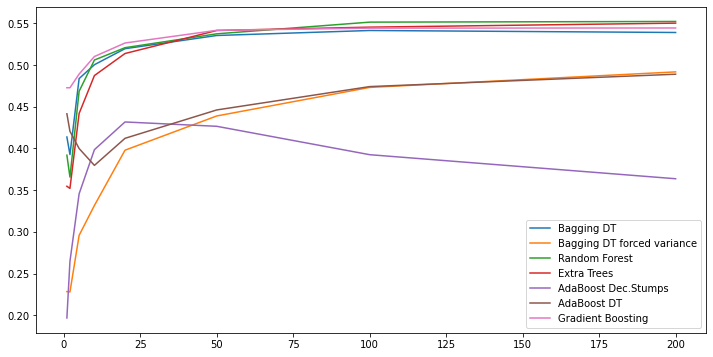

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

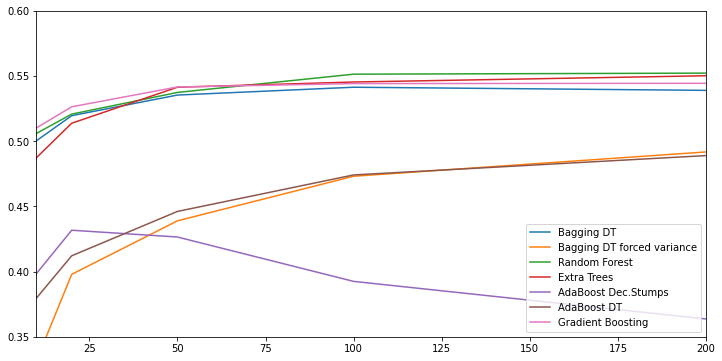

In [ ]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlim(10,200)
plt.ylim(0.35,0.6)
plt.show()

## Feature Selection with Forests of trees

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  


[0.17188608 0.07344439 0.06340402 0.07745197 0.10401614 0.10191357
 0.08226241 0.07845003 0.05817645 0.09778466 0.09121029]


In [ ]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))

(4999, 11)
0.30265252525252523
0.30265252525252523


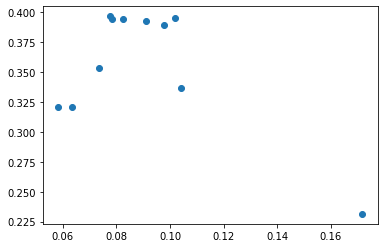

Best threshold:  0.07745197050355111


In [ ]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [ ]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cv, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cv, scoring='accuracy')))

(4999, 8)
Original:  0.27365050505050503
With FS:  0.39647272727272737
